## Trustpilot review of DK Î∂ÑÏÑù
- Dataset columns info
    - basic info : name, country, review_count(Î¶¨Î∑∞ÏûëÏÑ± ÌöüÏàò)
    - review info : writeing date, experience date, title, content, star_rates
- order : 1)EDA 2)Refining dataset

In [118]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

plt.rc("font", family="Malgul Gothic")
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')


today = datetime.today()

# call up the data
file_path = ".\\01.dataset"
file_name = "trustpilot_review_250329.csv"

review_raw= pd.read_csv(os.path.join(file_path,file_name))
# drop useless column
review_raw=review_raw.iloc[:,1:]

In [119]:
# ÏúÑÏóêÏÑú ÎßåÎì† Íµ≠Í∞Ä ÏΩîÎìú ‚Üí Íµ≠Í∞Ä Ïù¥Î¶Ñ ÎîïÏÖîÎÑàÎ¶¨
country_name_dict = {
    'CO': 'ÏΩúÎ°¨ÎπÑÏïÑ', 'MX': 'Î©ïÏãúÏΩî', 'PT': 'Ìè¨Î•¥Ìà¨Í∞à', 'US': 'ÎØ∏Íµ≠', 'IN': 'Ïù∏ÎèÑ',
    'ES': 'Ïä§ÌéòÏù∏', 'GB': 'ÏòÅÍµ≠', 'AU': 'Ìò∏Ï£º', 'DE': 'ÎèÖÏùº', 'SG': 'Ïã±Í∞ÄÌè¨Î•¥',
    'AE': 'ÏïÑÎûçÏóêÎØ∏Î¶¨Ìä∏', 'PL': 'Ìè¥ÎûÄÎìú', 'SK': 'Ïä¨Î°úÎ∞îÌÇ§ÏïÑ', 'SA': 'ÏÇ¨Ïö∞ÎîîÏïÑÎùºÎπÑÏïÑ',
    'CA': 'Ï∫êÎÇòÎã§', 'NZ': 'Îâ¥ÏßàÎûúÎìú', 'CL': 'Ïπ†Î†à', 'IT': 'Ïù¥ÌÉàÎ¶¨ÏïÑ', 'FR': 'ÌîÑÎûëÏä§',
    'MY': 'ÎßêÎ†àÏù¥ÏãúÏïÑ', 'TR': 'ÌäÄÎ•¥ÌÇ§Ïòà', 'BR': 'Î∏åÎùºÏßà', 'FI': 'ÌïÄÎûÄÎìú', 'NL': 'ÎÑ§ÎçúÎûÄÎìú',
    'HU': 'ÌóùÍ∞ÄÎ¶¨', 'PH': 'ÌïÑÎ¶¨ÌïÄ', 'TH': 'ÌÉúÍµ≠', 'GR': 'Í∑∏Î¶¨Ïä§', 'SE': 'Ïä§Ïõ®Îç¥',
    'CH': 'Ïä§ÏúÑÏä§', 'AT': 'Ïò§Ïä§Ìä∏Î¶¨ÏïÑ', 'KR': 'ÎåÄÌïúÎØºÍµ≠', 'BE': 'Î≤®Í∏∞Ïóê', 'IE': 'ÏïÑÏùºÎûúÎìú',
    'DK': 'Îç¥ÎßàÌÅ¨', 'RO': 'Î£®ÎßàÎãàÏïÑ', 'VN': 'Î≤†Ìä∏ÎÇ®', 'PK': 'ÌååÌÇ§Ïä§ÌÉÑ', 'HR': 'ÌÅ¨Î°úÏïÑÌã∞ÏïÑ',
    'AM': 'ÏïÑÎ•¥Î©îÎãàÏïÑ', 'EG': 'Ïù¥ÏßëÌä∏', 'PE': 'ÌéòÎ£®', 'HK': 'ÌôçÏΩ©'
}

# ÎîïÏÖîÎÑàÎ¶¨Î•º Ïù¥Ïö©Ìï¥ Íµ≠Í∞Ä Ïù¥Î¶Ñ Ïª¨Îüº Ï∂îÍ∞Ä
review_raw['country_kr'] = review_raw['country'].map(country_name_dict)


In [120]:
# 2. refining datetype data
# 2.1 review_date refine _ removing Updated
review_raw['edit']=None
review_raw['edit']=review_raw['review_date'].str.contains('Updated',na=False)
review_raw['review_date']=review_raw['review_date'].str.replace('Updated ','',regex=False)

# 2.2 Change the formate of datetype date
review_raw['review_date'] = pd.to_datetime(review_raw['review_date'], errors='coerce').dt.strftime('%Y-%m-%d')
review_raw['experience_date'] = pd.to_datetime(review_raw['experience_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# 2.3 drop duplicate
review_raw=review_raw.drop_duplicates(subset=['name','content'],keep='first')

### 0.Fundamental EDA
1. reviewer info
2. star_rate description
3. date description

In [121]:
# 1. reviewer_info _contry
contry_counts= review_raw['country_kr'].value_counts().reset_index(name='user_counts')
contry_rate=review_raw['country_kr'].value_counts(normalize=True).reset_index(name='user_rate')
contry_rate['user_rate']=round(contry_rate['user_rate']*100,2)
pd.merge(contry_counts,contry_rate,on='country_kr').head(10)

country_kr  user_counts  user_rate
0         ÎØ∏Íµ≠           66      27.62
1         ÏòÅÍµ≠           28      11.72
2        Ï∫êÎÇòÎã§           16       6.69
3         ÎèÖÏùº           11       4.60
4        Î©ïÏãúÏΩî           10       4.18
5        ÌîÑÎûëÏä§           10       4.18
6       Ïã±Í∞ÄÌè¨Î•¥            8       3.35
7       Ïù¥ÌÉàÎ¶¨ÏïÑ            8       3.35
8       ÎÑ§ÎçúÎûÄÎìú            7       2.93
9         Ìò∏Ï£º            7       2.93

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
review_raw[review_raw['country_kr'].isna()]

name country  review_count review_date experience_date  \
105  Millie N     NaN             2  2024-06-25      2024-06-03   

                                  title  \
105  Great service great shipping rates   

                                               content  star_rating  \
105  Great service great shipping rates. I got my p...            5   

    country_kr   edit  
105        NaN  False

In [122]:
# 2. review_count
reviewr_info = review_raw[['name','review_count']].drop_duplicates().sort_values(by='review_count',ascending=False)
reviewr_info_avg=review_raw.groupby('name')['star_rating'].mean().reset_index(name='star_rating_avg')
pd.merge(reviewr_info,reviewr_info_avg, on='name')

# review countÎäî ÏûêÏÇ¨ Î¶¨Î∑∞ Ïô∏ ÌÉÄÏÇ¨ Î¶¨Î∑∞ÎèÑ Ìè¨Ìï®Ìïú Ïà´ÏûêÏûÑÏùÑ ÌôïÏù∏Ìï®
    # Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑúÎäî Î∂àÌïÑÏöîÌïú Ï†ïÎ≥¥Î°ú Î≥¥ÏûÑ

name  review_count  star_rating_avg
0            Sabrina K.            65              1.0
1                 Jules            39              5.0
2    Miracles Follow me            28              4.0
3        Nina Soerensen            26              1.0
4                 carol            22              5.0
..                  ...           ...              ...
233    Jennilyn Mendoza             1              5.0
234        Leslie Huynh             1              5.0
235         XtineTinayL             1              5.0
236          Juhyun Lee             1              5.0
237         Calvin Chan             1              5.0

[238 rows x 3 columns]

In [123]:
review_raw['star_rating'].describe()

count    240.000000
mean       4.533333
std        1.101033
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: star_rating, dtype: float64

In [127]:
star_review_summary = review_raw['star_rating'].value_counts(normalize=False).rename('user_counts').to_frame().assign(
    user_rate=lambda df: round(df['user_counts'] / df['user_counts'].sum() * 100, 2)
).reset_index(names='star_rating')
star_review_summary

star_rating  user_counts  user_rate
0            5          190      79.17
1            4           25      10.42
2            1           16       6.67
3            2            5       2.08
4            3            4       1.67

In [128]:
# 3. Writing date of review
review_raw['review_date'] = pd.to_datetime(review_raw['review_date'], errors='coerce')
review_raw['experience_date'] = pd.to_datetime(review_raw['experience_date'], errors='coerce')

review_raw[['review_date','experience_date']].describe()

review_date      experience_date
count                  240                  240
mean   2024-04-20 22:00:00  2024-03-31 07:00:00
min    2022-01-22 00:00:00  2022-01-22 00:00:00
25%    2024-03-18 00:00:00  2024-01-31 18:00:00
50%    2024-06-25 00:00:00  2024-05-25 12:00:00
75%    2024-09-30 12:00:00  2024-09-28 00:00:00
max    2025-03-18 00:00:00  2025-03-18 00:00:00

In [129]:
review_raw['spending_date']=review_raw['review_date']-review_raw['experience_date']
review_raw[review_raw['spending_date']> '30 days'].shape
# ÏÑúÎπÑÏä§ Í≤ΩÌóò ÌõÑ 30ÏùºÏù¥ÏÉÅ Í≤ΩÍ≥ºÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑúÎπÑÏä§ Ïù¥Ïö©Ïóê ÎåÄÌï¥ ÏùòÎØ∏Í∞Ä ÏûàÏùÑ Í≤ÉÏù∏ÏßÄ, Í≥†ÎØºÏù¥ ÌïÑÏöîÌï®

(41, 11)

### 2.Text Mining
- Í∞êÏ†ïÎ∂ÑÏÑù(Sentiment Analysis) : Í∞ÄÏû• Î≥¥Ìé∏Ï†ÅÏù¥Í≥†, Ï†ïÏÑ±Î¶¨Î∑∞Î•º Ï†ïÎüâÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌï† Ïàò ÏûàÏñ¥ÏÑú Ïã§Î¨¥ÏóêÏÑú ÎßéÏù¥ ÏÇ¨Ïö©Îê®  
    - [1Îã®Í≥Ñ] Data Preprocessing _ Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú  
        + ÏÜåÎ¨∏Ïûê Î≥ÄÌôò, Ï∂ïÏïΩÏñ¥ Î≥µÏõê, Ïù¥Î™®ÏßÄ Ï†úÍ±∞, URLÏ†úÍ±∞, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞, Ïà´Ïûê Ï†úÍ±∞, Î∂àÏö©Ïñ¥ Ï†úÍ±∞  

    - [2Îã®Í≥Ñ] Sentiment Analysis Í∞êÏ†ï Î∂ÑÏÑù  
        + ÏÇ¨Ïö©ÎèÑÍµ¨ : VADER (Valence Aware Divtionary and sEntiment Reasoner)

In [130]:
review_raw.columns

Index(['name', 'country', 'review_count', 'review_date', 'experience_date',
       'title', 'content', 'star_rating', 'country_kr', 'edit',
       'spending_date'],
      dtype='object')

#### 2.1 [1Îã®Í≥Ñ] Data Preprocessing _ Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú 

In [131]:
import re
import emoji
import contractions

# Í∏∞Î≥∏ Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏ ÏßÅÏ†ë Ï†ïÏùò (ÌïÑÏöîÏãú ÌôïÏû• Í∞ÄÎä•)
custom_stopwords = set([
    'the', 'a', 'an', 'is', 'are', 'am', 'was', 'were', 'be', 'been', 'has', 'have', 'had',
    'this', 'that', 'these', 'those', 'of', 'to', 'in', 'on', 'at', 'for', 'and', 'but', 'or',
    'if', 'then', 'so', 'because', 'as', 'with', 'do', 'does', 'did', 'not', 'no', 'yes', 'i',
    'you', 'he', 'she', 'it', 'we', 'they', 'me', 'my', 'your', 'our', 'their','far', 'th'
])

def clean_text(text):
    if not isinstance(text, str):
        return ''
    
    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()
    
    # 2. Ï∂ïÏïΩÏñ¥ Î≥µÏõê
    text = contractions.fix(text)
    
    # 3. Ïù¥Î™®ÏßÄ Ï†úÍ±∞
    text = emoji.replace_emoji(text, replace='')

    # 4. URL, Ïù¥Î©îÏùº Ï†úÍ±∞
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    
    # 5. ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    
    # 6. Ïà´Ïûê Ï†úÍ±∞
    text = re.sub(r'\d+', '', text)

    # 7. Í≥µÎ∞± Ï†ïÎ¶¨
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 8. Î∂àÏö©Ïñ¥ Ï†úÍ±∞ (custom list)
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]

    return ' '.join(tokens)

In [132]:
# Ï†ïÏ†úÎêú ÌÖçÏä§Ìä∏ Ïª¨Îüº Ï∂îÍ∞Ä
df = review_raw
# Î≥ÑÏ†ê Ï†ïÏàòÌòï Î≥ÄÌôò
df['star_rating'] = df['star_rating'].astype(int)
df['title_clean'] = df['title'].apply(clean_text)
df['content_clean'] = df['content'].apply(clean_text)

#### 1Ï∞® Í≤ÄÏàò

In [133]:
## (Í≤ÄÏàò1) Ï†ÑÏ≤¥ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ÌïòÍ∏∞
# pd.set_option('display.max_colwidth', None)
# df.loc[210:240,['content', 'content_clean']]

## (Í≤ÄÏàò2) Ï†ïÏ†ú Ï†ÑÌõÑ ÎπÑÍµê ÌïòÏó¨ Î≥ÄÍ≤ΩÏù¥ ÌÅ∞ Ìñâ Ï∞æÍ∏∞
# df['length_diff'] = df.apply(lambda row : abs(len(str(row['content'])) - len(str(row['content_clean']))), axis = 1)

# df.sort_values(by = 'length_diff', ascending=False, inplace=True)
# df[['length_diff','content', 'content_clean']].head(10)

#### 2.2 [2Îã®Í≥Ñ] Sentiment Analysis Í∞êÏ†ï Î∂ÑÏÑù 
1. VADER Î∂ÑÏÑù : Îã®Ïñ¥ ÏÇ¨Ï†Ñ Í∏∞Î∞ò Î∂ÑÏÑù
    - ÎπÑÍµêÏ†Å Î∂ÑÏÑùÏù¥ Îπ†Î•¥Í≥† ÏÑ§ÏπòÍ∞Ä Ïâ¨Ïö¥ Î∞òÎ©¥Ïóê, Îã®Ïñ¥ ÏÇ¨Ï†ÑÏùò ÎúªÏóê Îî∞Îùº Ï†êÏàòÎ•º Îß§Í∏∞Îäî Î∞©Î≤ïÏù¥ÎùºÏÑú, Í∏çÏ†ïÏùò ÏùòÎØ∏Î•º Ìè¨Ìï®Ìïú Îã®Ïñ¥Í∞Ä ÏûàÎã§Î©¥ Î∂ÄÏ†ïÏ†ÅÏù∏ Îã®Ïñ¥Í∞Ä ÏûàÏùåÏóêÎèÑ Í∏çÏ†ïÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå
        + Í≤∞Í≥ºÍ∞í(scoreÍ∞í) : Í∞êÏ†ï Î∂ÑÏÑùÏóê Îî∞Î•∏ Í∞êÏ†ïÏùò Í∞êÎèÑÏóê Îî∞Î•∏ Í≤∞Í≥ºÍ∞í
2. BERT Î∂ÑÏÑù : Îî•Îü¨Îãù Í∏∞Î∞ò Î¨∏Îß• Î∂ÑÏÑù
    - VADER Î∂ÑÏÑùÎ≥¥Îã§ ÎäêÎ¶¨ÏßÄÎßå Î¨∏Îß• Í∏∞Î∞òÏúºÎ°ú Î∂ÑÏÑùÌï®, Îã®, GPUÍ∞Ä ÏóÜÏúºÎ©¥ ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶º
        + Í≤∞Í≥ºÍ∞í(scoreÍ∞í) : Î∂ÑÏÑùÌïú Í∞êÏ†ïÏùº ÌôïÎ•† (Î∂ÑÏÑùÌõÑ Ï∏°Ï†ïÎêòÎäî Í∞êÏ†ïÏù¥ positiveÏùºÎïå, positiveÎ°ú Ïûò ÏòàÏ∏°ÏùÑ ÌñàÎäîÏßÄÏóê ÎåÄÌïú ÌôïÎ•†)
        + Ï∞∏Í≥†! : BERTÎ∂ÑÏÑùÏùÄ neutralÍ∞íÏù¥ ÏóÜÏùåÏúºÎ°ú scoreÍ∞íÏù¥ 0.6ÎØ∏ÎßåÏù∏ Í≤ΩÏö∞ Ï§ëÎ¶ΩÏúºÎ°ú Î¥Ñ

<Ï§ëÏöî> 2Í∞úÏùò Î∂ÑÏÑù Î∞©ÏãùÏùò Í≤∞Í≥ºÍ∞í(scoreÍ∞í)Ïù¥ ÏùòÎØ∏ÌïòÎäî Î∞îÍ∞Ä ÏÉÅÏù¥Ìï®ÏúºÎ°ú label(Í∏çÏ†ï,Î∂ÄÏ†ï,Ï§ëÎ¶Ω)ÏùÑ ÎπÑÍµêÌï®

##### 2.2.1 VADER(Î≤†Ïù¥Îçî) Î∂ÑÏÑù : - Value Aware Dictionary for Sentiment Reasoning

In [134]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return pd.Series([0.0, 'neutral'])

    score = analyzer.polarity_scores(text)['compound']

    if score >= 0.05:
        label = 'positive'
    elif score <= -0.05:
        label = 'negative'
    else:
        label = 'neutral'

    return pd.Series([score, label])

df[['content_sentiment_score','content_sentiment_label']] = df['content_clean'].apply(get_sentiment)


content_sentiment_label
positive    93.0
negative     4.0
neutral      2.0
Name: proportion, dtype: float64


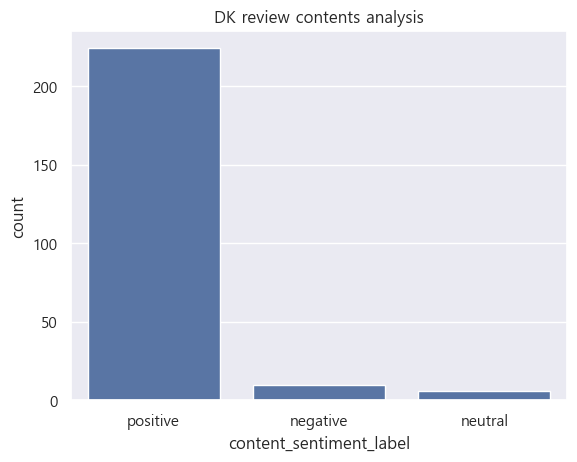

In [135]:
#### (Í≤ÄÏàò3) 1Ï∞® Î∂ÑÏÑù ÌôïÏù∏
print(df['content_sentiment_label'].value_counts(normalize=True).round(2)*100)

import matplotlib.pyplot as plt

sns.countplot(data=df, x='content_sentiment_label', order=list(df['content_sentiment_label'].unique()))
plt.title("DK review contents analysis")
plt.show()

##### 2.2.1-1 VADER Í∞êÏ†ïÎ∂ÑÏÑù ÌäúÎãù : 
- star_ratingÍ∞íÏùÑ Î∞òÏòÅÌïòÏó¨ sentiment_scoreÍ∞í Í∞úÏÑ†
    + star_rating Î∂ÑÎ•ò :  
        - 1~2 : nagative | 3 : neutral | 4~5 : positive

In [136]:
# star_rating condition
con_pos_rate = df['star_rating']>3
con_nag_rate = df['star_rating']<3
con_neu_rate = df['star_rating']==3

# sentiment_score conditino
con_pos_senti = df['content_sentiment_score'] >= 0.05
con_nag_senti = df['content_sentiment_score'] <= -0.05
con_neu_senti = (df['content_sentiment_score'] < 0.05) & (df['content_sentiment_score'] > -0.05)

In [137]:
# df[con_pos_senti & con_nag_rate][['review_date','star_rating','content','content_clean','content_sentiment_score']] # 9 reviews
df[con_nag_senti & con_pos_rate][['review_date','star_rating','content','content_clean','content_sentiment_score']]#.shape # 1 review

review_date  star_rating  \
226  2022-10-13            5   

                                               content  \
226  There was a problem in the customs of my count...   

                                         content_clean  \
226  there problem customs country will let shipmen...   

     content_sentiment_score  
226                  -0.4019

In [138]:
def adjust_sentiment(row):
    score = row['content_sentiment_score']
    rating = row['star_rating']
    
    # Î≥¥Ï†ï Í∞ïÎèÑ ÏÑ§Ï†ï (Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÏòÅÌñ• ÌÅº)
    adjustment = 0.95
    
    # Î≥ÑÏ†êÏù¥ ÎÇÆÏùÄÎç∞ Í∞êÏ†ï Ï†êÏàòÍ∞Ä Í∏çÏ†ïÏ†ÅÏù∏ Í≤ΩÏö∞ ‚Üí Ï†êÏàò ÌïòÌñ•
    if rating < 3 and score > 0:
        score -= adjustment
    # Î≥ÑÏ†êÏù¥ ÎÜíÏùÄÎç∞ Í∞êÏ†ï Ï†êÏàòÍ∞Ä Î∂ÄÏ†ïÏ†ÅÏù∏ Í≤ΩÏö∞ ‚Üí Ï†êÏàò ÏÉÅÌñ•
    elif rating > 3 and score < 0:
        score += adjustment

    # Ï†êÏàò Î≤îÏúÑ Ï†úÌïú (-1 ~ 1)
    score = max(min(score, 1.0), -1.0)

    # Ï°∞Ï†ïÎêú Ï†êÏàòÏóê Îî∞Îùº Î†àÏù¥Î∏î Ïû¨Ìï†Îãπ
    if score >= 0.05:
        label = 'positive'
    elif score <= -0.05:
        label = 'negative'
    else:
        label = 'neutral'
    
    return pd.Series([score, label])

In [139]:
df[['content_sentiment_score_adj', 'content_sentiment_label_adj']] = df.apply(adjust_sentiment, axis=1)

In [140]:
#### (Í≤ÄÏàò3) 1Ï∞® Î∂ÑÏÑù ÌôïÏù∏
before=df['content_sentiment_label'].value_counts().reset_index(name='before_label(a)')
after_adjustment=df['content_sentiment_label_adj'].value_counts().reset_index(name='after_label(b)')

result_adj= pd.merge(before, after_adjustment,right_on='content_sentiment_label_adj',left_on='content_sentiment_label')
result_adj=result_adj.drop('content_sentiment_label_adj',axis=1)

#result_adj['comparison(b-a)']=result_adj['after_label(b)']-result_adj['before_label(a)']
result_adj['comparison(b-a)']=result_adj.iloc[:,2]-result_adj.iloc[:,1]
result_adj

content_sentiment_label  before_label(a)  after_label(b)  comparison(b-a)
0                positive              224             216               -8
1                negative               10              17                7
2                 neutral                6               7                1

In [141]:
# df[con_nag_senti & con_pos_rate][['review_date','star_rating','content','content_clean','content_sentiment_score','content_sentiment_score_adj','content_sentiment_label_adj']]#.shape # 1 review
#df[con_pos_senti & con_nag_rate][['review_date','star_rating','content','content_clean','content_sentiment_score','content_sentiment_score_adj','content_sentiment_label_adj']] # 9 reviews

##### 2.2.1-2 Í∞êÏ†ïÎ∂ÑÏÑù ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù : star_ratingÏôÄ sentiment_scoreÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [142]:
before_corr_value = df['content_sentiment_score'].corr(df['star_rating'])
after_corr_value = df['content_sentiment_score_adj'].corr(df['star_rating'])
print(f"Í∞êÏ†ï Ï†êÏàòÏôÄ Î≥ÑÏ†êÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò \n ÌäúÎãù Ï†Ñ : {round(before_corr_value, 3)} \n ÌäúÎãù ÌõÑ : {round(after_corr_value, 3)}")

Í∞êÏ†ï Ï†êÏàòÏôÄ Î≥ÑÏ†êÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò 
 ÌäúÎãù Ï†Ñ : 0.571 
 ÌäúÎãù ÌõÑ : 0.801


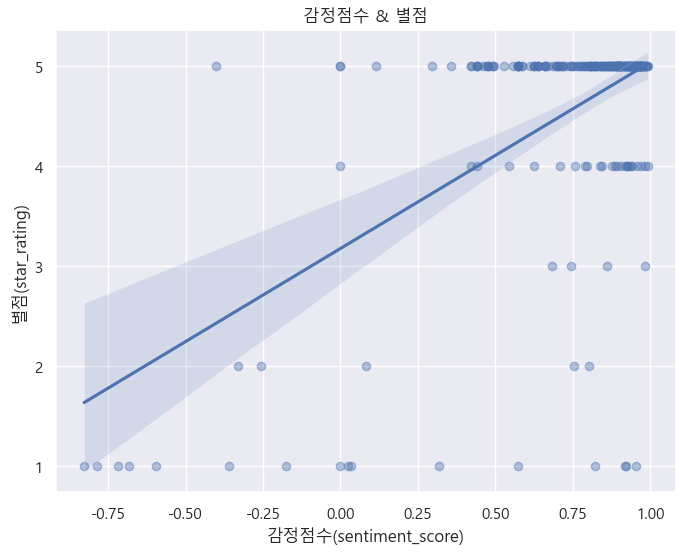

In [143]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='content_sentiment_score',y='star_rating', #regplot : ÏÇ∞Ï†êÎèÑÏôÄ ÌöåÍ∑ÄÏÑ†ÏùÑ Í∑∏Î†§Ï£ºÎäî ÏãúÍ∞ÅÌôî Ìï®Ïàò
            scatter_kws={'alpha':0.4}) #ÏÇ∞Ï†êÎèÑÏùò Ï†êÏùò ÏÜçÏÑ± Ï°∞Ï†à Ìà¨Î™ÖÎèÑÎ•º ÏÑ§Ï†ïÌïòÎäî Îß§Í∞úÎ≥ÄÏàò
plt.title("Í∞êÏ†ïÏ†êÏàò & Î≥ÑÏ†ê")
plt.xlabel("Í∞êÏ†ïÏ†êÏàò(sentiment_score)")
plt.ylabel("Î≥ÑÏ†ê(star_rating)")
plt.grid(True) # Í∑∏ÎûòÌîÑÏóê Í≤©ÏûêÏ∂îÍ∞Ä
plt.show()

##### 2.2.2 BERT(Î≤ÑÌä∏)Î∂ÑÏÑù

In [144]:
from transformers import pipeline
from tqdm import tqdm

# Í∞êÏ†ï Î∂ÑÏÑù ÌååÏù¥ÌîÑÎùºÏù∏ ÏÉùÏÑ±
sentiment_pipeline = pipeline("sentiment-analysis")
# Check the procession with tqdm
def get_bert_sentiment(texts):
    results = []
    for text in tqdm(texts):
        if not isinstance(text, str) or text.strip() == "":
            results.appent({"label": "neutural", "score": 0.0})
        else:
            try:
                result = sentiment_pipeline(text[:512])[0]
                results.append(result)
            except:
                results.append({"label": "neutural", "score": 0.0})
    return results

# Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º Ï†ÅÏö©
bert_results = get_bert_sentiment(df['content'])

# result
df['bert_sentiment_label'] = [r['label'] for r in bert_results]
df['bert_sentiment_score'] = [r['score'] for r in bert_results]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 240/240 [00:24<00:00,  9.92it/s]


In [145]:
# Ìï®Ïàò _ labelÍ∞íÏóê neutral Í∞í Ï∂îÍ∞Ä
def convert_bert_label(label, score, threshold=0.6):
    if score < threshold:
        return 'neutral'
    elif label.upper() == 'POSITIVE':
        return 'positive'
    else:
        return 'negative'

# labelÍ∞íÏóê neutral Í∞í Ï∂îÍ∞Ä   
df['bert_sentiment_label_adj'] = df.apply(lambda x: convert_bert_label(x['bert_sentiment_label'],x['bert_sentiment_score']),axis=1)

bert_sentiment_label_adj
positive    83.0
negative    16.0
neutral      1.0
Name: proportion, dtype: float64


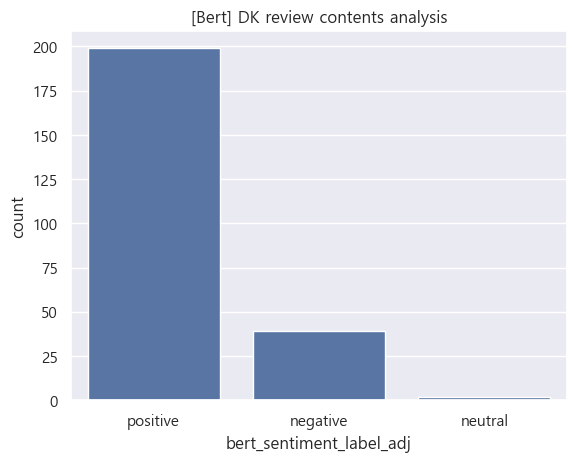

In [146]:
#### (Í≤ÄÏàò4) 2Ï∞® Î∂ÑÏÑù ÌôïÏù∏
print(df['bert_sentiment_label_adj'].value_counts(normalize=True).round(2)*100)

sns.countplot(data=df, x='bert_sentiment_label_adj', order=list(df['bert_sentiment_label_adj'].unique()))
plt.title("[Bert] DK review contents analysis")
plt.show()

In [ ]:
# vader vs bert Î∂ÑÎ•ò Í≤∞Í≥º ÎπÑÍµê (ÏàòÏ†Å ÎπÑÍµê)
vader = df.groupby('content_sentiment_label_adj')['name'].count().reset_index(name='vader_result')
bert = df.groupby('bert_sentiment_label_adj')['name'].count().reset_index(name='bert_result')

result = pd.merge(vader.set_index('content_sentiment_label_adj'),
                  bert.set_index('bert_sentiment_label_adj'),
                  left_index=True, right_index=True,how='outer')
result.sort_values(by='vader_result',ascending=False)

vader_result  bert_result
content_sentiment_label_adj                           
positive                              216          199
negative                               17           39
neutral                                 7            2

In [153]:
# vader vs bert Î∂ÑÎ•ò Í≤∞Í≥º ÎπÑÍµê (Î∂ÑÏÑù ÌõÑ Í≤∞Í≥º Í∞í ÎπÑÍµê)
df['comparision_VB'] = df['content_sentiment_label_adj']==df['bert_sentiment_label_adj']
match_rate=df['comparision_VB'].mean()

print(f"Vader & Bert Í∞êÏ†ïÏùºÏπòÏú® ÎπÑÍµê : {round(match_rate*100)}(%)")

Vader & Bert Í∞êÏ†ïÏùºÏπòÏú® ÎπÑÍµê : 88(%)


In [155]:
df[df['comparision_VB']==False][['content','star_rating','content_sentiment_label_adj','bert_sentiment_label_adj','comparision_VB']]

content  star_rating  \
5    So far so good, but we're only at the purchasi...            4   
8    I have used delivered korea 4 times in 2024 fo...            5   
15   Ive been ordering items from Korea (Bunjang) v...            4   
19   I've been using Delivered Korea for close to 2...            5   
37   Communication DEFINITELY needs work!I put in a...            3   
46   They are the best proxy I have ever used, and ...            5   
80   I have used this service to purchase. I enjoy ...            4   
85   Good k-addy experience, but the consolidation ...            5   
92   Trustworthy proxy. I didn't appreciate much ho...            3   
100  It's been a week and a half, and my issue is s...            2   
102  I have been using DeliveredKorea for a couple ...            4   
111  My experience with them is the best. They know...            4   
134  I posted a review here on the 14th in desperat...            1   
142  I‚Äôve used Delivered Korea a few times now and ...            1   
146  I've used DK a few times now. My packages have...            3   
149  If you're familiar with shopping services, Del...            3   
153                                 The quick response            5   
165  Good reliable Proxy Services. Shipped packaged...            5   
184  I've been using this service for years now. I ...            5   
196  I was somewhat nervous about buying DVDs from ...            5   
197  Ordered an item from Korea and instead of payi...            4   
199  I recently had the displeasure of dealing with...            1   
200  This company is very easy to navigate and use ...            4   
204  I love finally being able to purchase from Bun...            5   
212  They have very slow communication, also slow o...            1   
217  Terrible bot-like communication. Made one orde...            1   
223  I was sceptical ordering from this company as ...            5   
226  There was a problem in the customs of my count...            5   
235  I already used this service 2 times to ship kp...            5   

    content_sentiment_label_adj bert_sentiment_label_adj  comparision_VB  
5                      positive                 negative           False  
8                       neutral                 negative           False  
15                     positive                 negative           False  
19                     positive                 negative           False  
37                     positive                 negative           False  
46                     positive                 negative           False  
80                     positive                 negative           False  
85                     positive                 negative           False  
92                     positive                 negative           False  
100                    negative                 positive           False  
102                    positive                 negative           False  
111                    positive                 negative           False  
134                     neutral                 negative           False  
142                    negative                 positive           False  
146                    positive                 negative           False  
149                    positive                 negative           False  
153                     neutral                 positive           False  
165                    positive                 negative           False  
184                    positive                 negative           False  
196                    positive                  neutral           False  
197                     neutral                 negative           False  
199                     neutral                 negative           False  
200                    positive                 negative           False  
204                    positive                 negative           False  
212                     neutral        

In [ ]:
##### (Í≤ÄÏàò5) Vader vs Bert Ïùò Ïã§Ï†ú ÌèâÍ∞ÄÏôÄ ÏùºÏπòÏó¨Î∂Ä with Star_rating
def label_from_star(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['star_sentiment_label'] = df['star_rating'].apply(label_from_star)

# Í∞ÅÍ∞Å ÎπÑÍµê
df['vader_correct'] = df['content_sentiment_label'] == df['star_sentiment_label']
df['vader_adj_correct'] = df['content_sentiment_label_adj'] == df['star_sentiment_label']
df['bert_correct'] = df['bert_sentiment_label_adj'] == df['star_sentiment_label']

# Ï†ïÌôïÎèÑ ÎπÑÍµê
print(f"‚úÖ VADER Ï†ïÌôïÎèÑ(ÌäúÎãù Ï†Ñ): {df['vader_correct'].mean():.2%}")
print(f"‚úÖ VADER Ï†ïÌôïÎèÑ(ÌäúÎãù ÌõÑ): {df['vader_adj_correct'].mean():.2%}")
print(f"‚úÖ BERT Ï†ïÌôïÎèÑ: {df['bert_correct'].mean():.2%}")

‚úÖ VADER Ï†ïÌôïÎèÑ(ÌäúÎãù Ï†Ñ): 91.67%
‚úÖ VADER Ï†ïÌôïÎèÑ(ÌäúÎãù ÌõÑ): 95.42%
‚úÖ BERT Ï†ïÌôïÎèÑ: 90.00%


#### Í∞êÏ†ïÎ∂ÑÏÑù(Sentiment-analyses)
Vader & BertÎ∂ÑÏÑùÏùÑ Î™®Îëê ÏßÑÌñâÌïú Í≤∞Í≥º, TrustpilotÏùò Delivered Korea Review Îç∞Ïù¥ÌÑ∞Îäî <b>Vader Î∂ÑÏÑùÌõÑ Î≥ÑÏ†êÏùÑ Î∞òÏòÅÌïòÏó¨ ÌäúÎãùÏùÑ ÌñàÏùÑ Îïå, Îçî ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥ÏûÑ</b>  
    - ÏùºÎ∞òÏ†ÅÏù∏ VaderÎ∂ÑÏÑùÏù¥ Î¶¨Î∑∞Ïùò Í∞êÏ†ïÏùÑ 100% ÏôÑÎ≤ΩÌïòÍ≤å Î∂ÑÏÑùÌïòÏßÄ Î™ªÌïòÏó¨, Î≥ÑÏ†êÏóê Îî∞Îùº Í∞êÏ†ï Í≤∞Í≥ºÎ•º Ï°∞Ï†ïÌñàÏùÑ Îïå ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥ÏòÄÏùå.  

### 3. ÏãúÍ∞Ñ Í≤ΩÍ≥ºÏóê Îî∞Î•∏ Í∞êÏÑ± Ìä∏ÎûúÎìú Î∂ÑÏÑù

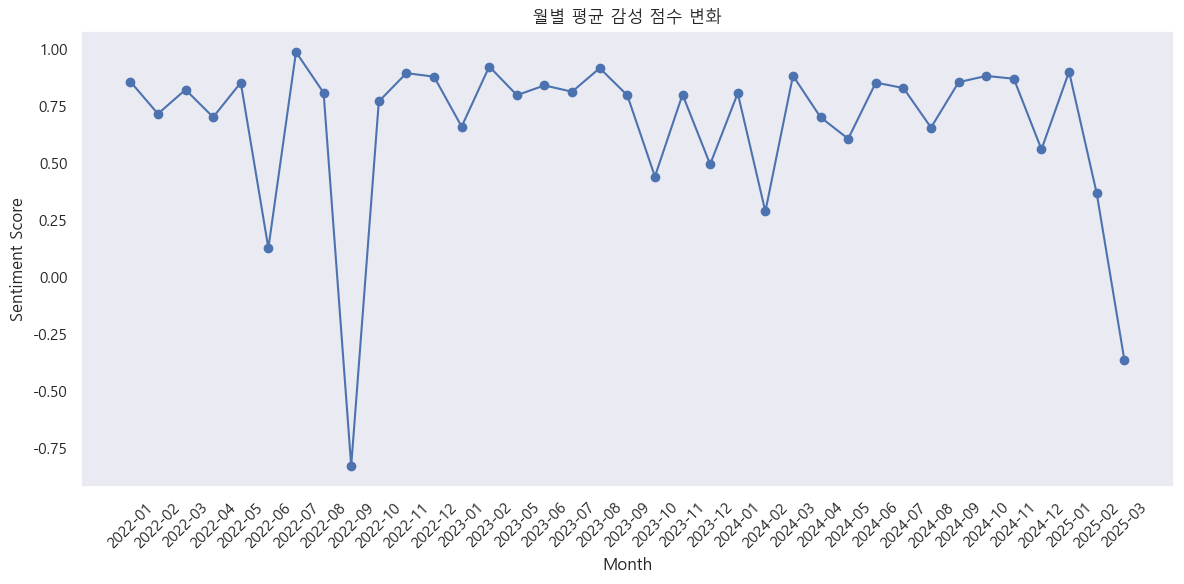

In [164]:
# Ïó∞/Ïõî Í∏∞Ï§Ä Í∑∏Î£πÌôî
df['year_month'] = df['review_date'].dt.to_period('M')
trend = df.groupby('year_month')['content_sentiment_score_adj'].median().reset_index()

# ÏãúÍ∞ÅÌôî (Ï∂îÌõÑ ÌôúÏö© Í∞ÄÎä•)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(trend['year_month'].astype(str), trend['content_sentiment_score_adj'], marker='o')
plt.title('ÏõîÎ≥Ñ ÌèâÍ∑† Í∞êÏÑ± Ï†êÏàò Î≥ÄÌôî')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


### 4. Í≥†Í∞ù ÎãàÏ¶à Î∂ÑÏÑù _ Î¶¨Î∑∞ ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú Ï†úÏûë

In [166]:
df.columns

Index(['name', 'country', 'review_count', 'review_date', 'experience_date',
       'title', 'content', 'star_rating', 'country_kr', 'edit',
       'spending_date', 'title_clean', 'content_clean',
       'content_sentiment_score', 'content_sentiment_label',
       'content_sentiment_score_adj', 'content_sentiment_label_adj',
       'bert_sentiment_label', 'bert_sentiment_score',
       'bert_sentiment_label_adj', 'comparision_VB', 'star_sentiment_label',
       'vader_correct', 'bert_correct', 'vader_adj_correct', 'year_month'],
      dtype='object')

In [170]:
from sklearn.feature_extraction.text import CountVectorizer

# ÌÇ§ÏõåÎìú ÎπàÎèÑ Ï∂îÏ∂ú
vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(df['content_clean'])
keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
keywords.drop(['korea','delivered'],axis=1, inplace=True)
# ÏÉÅÏúÑ ÌÇ§ÏõåÎìú
top_keywords = keywords.sum().sort_values(ascending=False)
print("üìå Í≥†Í∞ùÏù¥ DKÏóêÍ≤å ÏûêÏ£º Ïñ∏Í∏âÌïú ÌÇ§ÏõåÎìú:\n", top_keywords.head(10))


üìå Í≥†Í∞ùÏù¥ DKÏóêÍ≤å ÏûêÏ£º Ïñ∏Í∏âÌïú ÌÇ§ÏõåÎìú:
 service     183
shipping    113
use          81
using        79
buy          68
great        67
easy         66
package      65
items        63
customer     62
dtype: int64


üìå Í≥†Í∞ùÏù¥ DKÏóêÍ≤å ÏûêÏ£º Ïñ∏Í∏âÌïú ÌÇ§ÏõåÎìú:
 service       183
buy            68
great          67
easy           66
package        65
items          63
customer       62
time           62
packages       59
used           57
fast           56
services       54
good           51
recommend      48
order          41
really         38
experience     32
quick          31
love           31
bunjang        31
dtype: int64


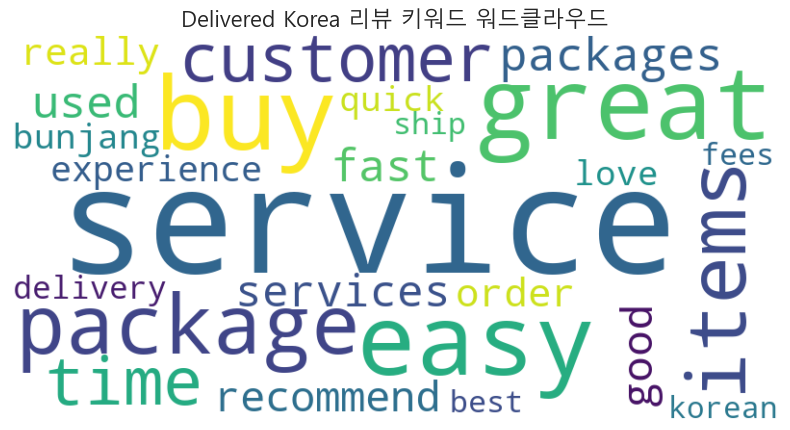

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 1. ÌÇ§ÏõåÎìú ÎπàÎèÑ Ï∂îÏ∂ú
vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(df['content_clean'])

# 2. ÌÇ§ÏõåÎìú DataFrame
keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 3. ÌäπÏ†ï ÌÇ§ÏõåÎìú Ï†úÍ±∞
keywords.drop(['korea','delivered','use','using','shipping'], axis=1, inplace=True, errors='ignore')

# 4. ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÏßëÍ≥Ñ
top_keywords = keywords.sum().sort_values(ascending=False)

print("üìå Í≥†Í∞ùÏù¥ DKÏóêÍ≤å ÏûêÏ£º Ïñ∏Í∏âÌïú ÌÇ§ÏõåÎìú:\n", top_keywords.head(20))

# 5. ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_keywords)

# 6. Ï∂úÎ†•
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Delivered Korea Î¶¨Î∑∞ ÌÇ§ÏõåÎìú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú", fontsize=16)
plt.show()


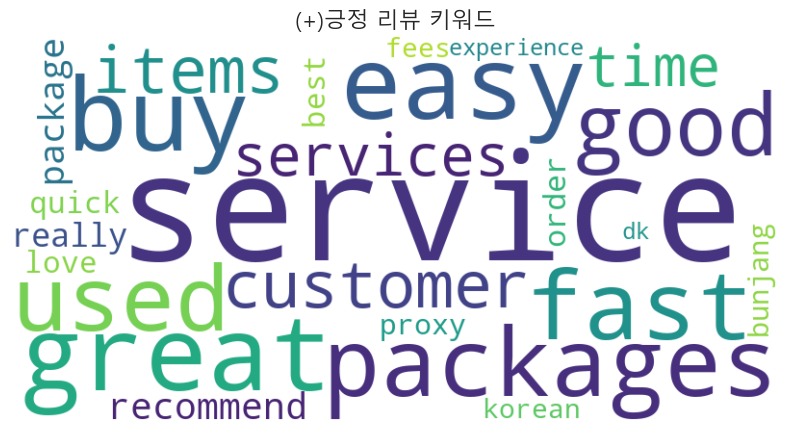

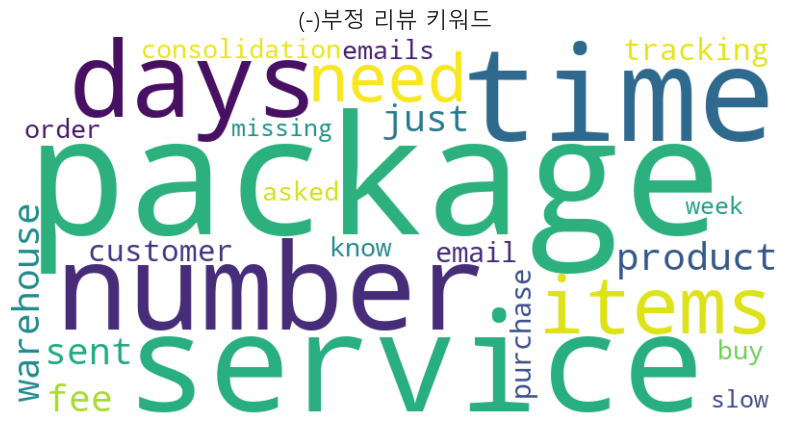

In [196]:
#### 4.2 Í∏çÏ†ï/Î∂ÄÏ†ï Î¶¨Î∑∞ Î∂ÑÎ¶¨ÌïòÏó¨ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# 1. Í∏çÏ†ï/Î∂ÄÏ†ï ÌÖçÏä§Ìä∏ Î∂ÑÎ¶¨ (Ïòà: BERT Í∏∞Ï§Ä)
positive_texts = df[df['content_sentiment_label_adj'] == 'positive']['content_clean']
negative_texts = df[df['content_sentiment_label_adj'] == 'negative']['content_clean']

# 2. Î≤°ÌÑ∞Ìôî Ìï®Ïàò Ï†ïÏùò
def get_top_keywords(text_series, max_words=30):
    vectorizer = CountVectorizer(stop_words='english', max_features=max_words)
    X = vectorizer.fit_transform(text_series)
    keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    keywords.drop(columns=['korea','delivered','use','using','shipping'], errors='ignore', inplace=True)
    top_keywords = keywords.sum().sort_values(ascending=False)
    return top_keywords

# 3. ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ìï®Ïàò Ï†ïÏùò
def show_wordcloud(freq, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate_from_frequencies(freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# 4. Í∞ÅÍ∞Å Î∂ÑÏÑù & ÏãúÍ∞ÅÌôî
positive_keywords = get_top_keywords(positive_texts)
negative_keywords = get_top_keywords(negative_texts)

show_wordcloud(positive_keywords, "(+)Í∏çÏ†ï Î¶¨Î∑∞ ÌÇ§ÏõåÎìú")
show_wordcloud(negative_keywords, "(-)Î∂ÄÏ†ï Î¶¨Î∑∞ ÌÇ§ÏõåÎìú")


#### 5. Î∂ÄÏ†ïÎ¶¨Î∑∞ Ï∂îÍ∞Ä Î∂ÑÏÑùÏúºÎ°ú Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú

In [193]:
# Î∂ÄÏ†ï Î¶¨Î∑∞Îßå ÌïÑÌÑ∞ÎßÅ
negative_reviews = df[df['content_sentiment_label_adj'] == 'negative']['content_clean']

# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(negative_reviews)

# ÌÇ§ÏõåÎìúÎ≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
neg_keywords = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out()).sort_values(ascending=False)
print("‚ùó Î∂ÄÏ†ï Î¶¨Î∑∞ÏóêÏÑú ÏûêÏ£º Ïñ∏Í∏âÎêú ÌÇ§ÏõåÎìú:\n")
print(neg_keywords.head(20))

‚ùó Î∂ÄÏ†ï Î¶¨Î∑∞ÏóêÏÑú ÏûêÏ£º Ïñ∏Í∏âÎêú ÌÇ§ÏõåÎìú:

shipping     18
package      18
service      12
number       11
days         11
time         11
items         9
need          8
product       8
just          7
korea         7
customer      7
fee           7
sent          7
warehouse     7
using         7
tracking      7
email         6
purchase      6
week          5
dtype: int64


In [197]:
issue_dict = {
    'Î∞∞ÏÜ°ÏßÄÏó∞/Î∞∞ÏÜ°Ïù¥Ïäà': [
        'shipping', 'delivery', 'shipped', 'ship',
        'time', 'days', 'times', 'order', 'tracking'
    ],
    'ÏÉÅÌíàÎàÑÎùΩ/ÌíàÏßà/Ïò§Î∞∞ÏÜ°': [
        'package', 'packages', 'item', 'items', 'product', 'number',
        'issue', 'purchasing', 'purchase', 'buy', 'make'
    ],
    'Î¨ºÎ•òÏ∞ΩÍ≥†/Î≥¥Í¥Ä': [
        'warehouse', 'lot', 'proxy', 'bunjang', 'korea'
    ],
    'Í≥ºÍ∏à/ÏöîÍ∏à Ïù¥Ïäà': [
        'fee', 'fees', 'pay', 'used'
    ],
    'Í≥†Í∞ùÏùëÎåÄ/CS': [
        'email', 'emails', 'reply', 'asked', 'say', 'sent', 'know',
        'company', 'customer', 'services', 'service', 'support'
    ],
    'ÏÇ¨Ïö©Í≤ΩÌóò/UX': [
        'use', 'using', 'just', 'good', 'experience', 'easy', 'like', 'recommend'
    ],
}

# ÎπàÎèÑ Í∏∞Ï§Ä ÌÇ§ÏõåÎìú ÏÉÅÏúÑ 30Í∞úÎßå ÏÇ¨Ïö©
top_neg_keywords = neg_keywords.head(30)

# Ïù¥Ïäà Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏßëÍ≥Ñ
issue_summary = {}

for category, keywords in issue_dict.items():
    total = sum([top_neg_keywords.get(word, 0) for word in keywords])
    issue_summary[category] = total

# Í≤∞Í≥º Ï†ïÎ†¨
issue_summary = pd.Series(issue_summary).sort_values(ascending=False)
print("\nüìå Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Ï£ºÏöî Í∞úÏÑ† ÌïÑÏöî ÏöîÏÜå:\n")
print(issue_summary)



üìå Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò Ï£ºÏöî Í∞úÏÑ† ÌïÑÏöî ÏöîÏÜå:

ÏÉÅÌíàÎàÑÎùΩ/ÌíàÏßà/Ïò§Î∞∞ÏÜ°    57
Î∞∞ÏÜ°ÏßÄÏó∞/Î∞∞ÏÜ°Ïù¥Ïäà      52
Í≥†Í∞ùÏùëÎåÄ/CS        47
ÏÇ¨Ïö©Í≤ΩÌóò/UX        19
Î¨ºÎ•òÏ∞ΩÍ≥†/Î≥¥Í¥Ä        14
Í≥ºÍ∏à/ÏöîÍ∏à Ïù¥Ïäà        7
dtype: int64


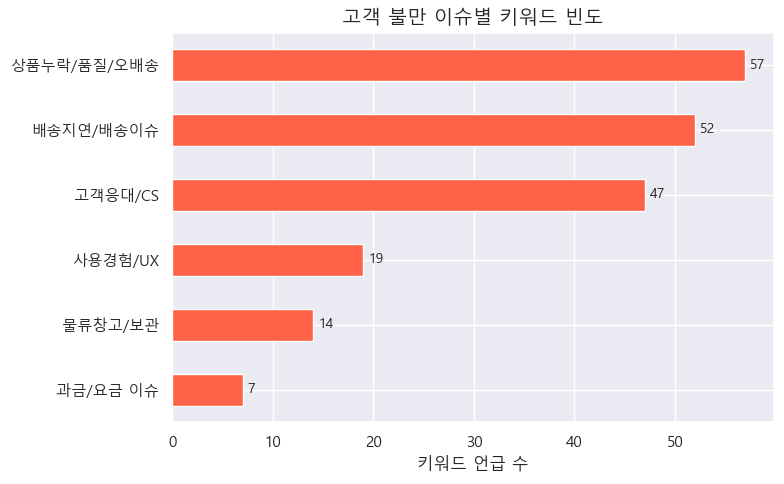

In [198]:
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
ax = issue_summary.plot(kind='barh', color='tomato')

plt.title('Í≥†Í∞ù Î∂àÎßå Ïù¥ÏäàÎ≥Ñ ÌÇ§ÏõåÎìú ÎπàÎèÑ', fontsize=14)
plt.xlabel('ÌÇ§ÏõåÎìú Ïñ∏Í∏â Ïàò')

# yÏ∂ï Îí§ÏßëÍ∏∞ (ÏÉÅÏúÑÍ∞Ä ÏúÑÎ°ú)
plt.gca().invert_yaxis()

# ÎßâÎåÄ ÏòÜÏóê Ïà´Ïûê ÌëúÏãú
for i, (value, label) in enumerate(zip(issue_summary.values, issue_summary.index)):
    plt.text(value + 0.5, i, str(int(value)), va='center', fontsize=10)

plt.tight_layout()
plt.show()


#### 6. ÎÇòÎùºÎ≥Ñ Î∂ÄÏ†ï Î¶¨Î∑∞ Î∂ÑÏÑù

In [ ]:
df[df['content_sentiment_label_adj']=='positive'].groupby('country_kr').agg(
    reviewer_count=('name', 'count'),
    star_rating_avg=('star_rating', 'mean')
).sort_values(by='reviewer_count', ascending=False)

reviewer_count  star_rating_avg
country_kr                                 
ÎØ∏Íµ≠                      59         4.796610
ÏòÅÍµ≠                      23         4.869565
Ï∫êÎÇòÎã§                     16         4.687500
ÎèÖÏùº                      11         4.909091
ÌîÑÎûëÏä§                     10         4.900000
Î©ïÏãúÏΩî                      9         4.666667
Ïù¥ÌÉàÎ¶¨ÏïÑ                     8         4.750000
ÎÑ§ÎçúÎûÄÎìú                     6         4.666667
Ïã±Í∞ÄÌè¨Î•¥                     6         4.833333
ÏΩúÎ°¨ÎπÑÏïÑ                     5         5.000000
Ìò∏Ï£º                       5         5.000000
ÏÇ¨Ïö∞ÎîîÏïÑÎùºÎπÑÏïÑ                  5         5.000000
Îâ¥ÏßàÎûúÎìú                     5         5.000000
ÌïÑÎ¶¨ÌïÄ                      5         5.000000
ÏïÑÎûçÏóêÎØ∏Î¶¨Ìä∏                   5         5.000000
Ïù∏ÎèÑ                       4         4.750000
Î∏åÎùºÏßà                      4         4.750000
Ïπ†Î†à                       2         5.000000
ÏïÑÏùºÎûúÎìú                     2         5.000000
ÎßêÎ†àÏù¥ÏãúÏïÑ                    2         5.000000
Ìè¥ÎûÄÎìú                      2         5.000000
ÌÉúÍµ≠                       2         5.000000
Ïä§ÌéòÏù∏                      2         5.000000
Í∑∏Î¶¨Ïä§                      1         5.000000
Î£®ÎßàÎãàÏïÑ                     1         5.000000
ÎåÄÌïúÎØºÍµ≠                     1         5.000000
Ïä¨Î°úÎ∞îÌÇ§ÏïÑ                    1         5.000000
ÏïÑÎ•¥Î©îÎãàÏïÑ                    1         5.000000
Î≤®Í∏∞Ïóê                      1         5.000000
Î≤†Ìä∏ÎÇ®                      1         5.000000
Ïä§Ïõ®Îç¥                      1         5.000000
Ïä§ÏúÑÏä§                      1         5.000000
Ïù¥ÏßëÌä∏                      1         5.000000
ÌååÌÇ§Ïä§ÌÉÑ                     1         5.000000
ÌÅ¨Î°úÏïÑÌã∞ÏïÑ                    1         5.000000
ÌäÄÎ•¥ÌÇ§Ïòà                     1         5.000000
ÌéòÎ£®                       1         5.000000
Ìè¨Î•¥Ìà¨Í∞à                     1         5.000000
ÌïÄÎûÄÎìú                      1         5.000000
ÌóùÍ∞ÄÎ¶¨                      1         5.000000

In [250]:
df[df['content_sentiment_label_adj']=='negative'].groupby('country_kr').agg(
    reviewer_count=('name', 'count'),
    star_rating_avg=('star_rating', 'mean')
).sort_values(by='reviewer_count', ascending=False)

reviewer_count  star_rating_avg
country_kr                                 
ÎØ∏Íµ≠                       5              1.6
ÏòÅÍµ≠                       3              1.0
Ïã±Í∞ÄÌè¨Î•¥                     2              1.0
Î©ïÏãúÏΩî                      1              1.0
Ïä§ÌéòÏù∏                      1              2.0
Î≤®Í∏∞Ïóê                      1              1.0
Ïò§Ïä§Ìä∏Î¶¨ÏïÑ                    1              1.0
Ìè¨Î•¥Ìà¨Í∞à                     1              1.0
Ìò∏Ï£º                       1              2.0
ÌôçÏΩ©                       1              1.0

In [226]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

# Ï†ÑÏ≤¥ Íµ≠Í∞Ä Î¶¨Ïä§Ìä∏
countries = df['country_kr'].dropna().unique()

# Í≤∞Í≥º Ï†ÄÏû• ÎîïÏÖîÎÑàÎ¶¨
country_issue_summary = {}

# Íµ≠Í∞ÄÎ≥Ñ Î∂ÑÏÑù
for country in countries:
    neg_texts = df[
        (df['content_sentiment_label_adj'] == 'negative') &
        (df['country_kr'] == country)
    ]['content_clean']
    
    if len(neg_texts) < 1:
         continue  # Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏùÄ Íµ≠Í∞ÄÎäî Ï†úÏô∏ ÌïòÎ†§Í≥† ÌïòÏòÄÏúºÎÇò Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞ ÏàòÍ∞Ä Ï†ÅÏúºÎ°ú Î™®Îëê Ìè¨Ìï®ÌïòÏó¨ Î∂ÑÏÑù

    # ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
    vectorizer = CountVectorizer(stop_words='english', max_features=50)
    X = vectorizer.fit_transform(neg_texts)
    keywords = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())

    # Ïù¥ÏäàÎ≥Ñ ÌÇ§ÏõåÎìú Îß§Ìïë
    issue_counts = {}
    for issue, word_list in issue_dict.items():
        total = sum([keywords.get(w, 0) for w in word_list])
        issue_counts[issue] = total
    
    # Ï†ÄÏû•
    country_issue_summary[country] = issue_counts

In [ ]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
country_issue_df = pd.DataFrame(country_issue_summary).T.fillna(0).astype(int)
country_issue_df = country_issue_df.sort_index()
country_issue_df['sum'] = country_issue_df.sum(axis=1)

# Ïó¥Î≥Ñ Ìï©Í≥Ñ Í≥ÑÏÇ∞
total_row = pd.DataFrame(country_issue_df.sum()).T

# Ïù∏Îç±Ïä§ Ïù¥Î¶Ñ ÏßÄÏ†ï (Ïòà: 'Ìï©Í≥Ñ')
total_row.index = ['Ìï©Í≥Ñ']

# Í∏∞Ï°¥ dfÏóê Ìï©Í≥Ñ Ìñâ Ï∂îÍ∞Ä
country_issue_df_with_total = pd.concat([country_issue_df, total_row])

# ÌôïÏù∏



In [ ]:
country_issue_df_with_total.sort_values(by='sum',ascending=False)

Î∞∞ÏÜ°ÏßÄÏó∞/Î∞∞ÏÜ°Ïù¥Ïäà  ÏÉÅÌíàÎàÑÎùΩ/ÌíàÏßà/Ïò§Î∞∞ÏÜ°  Î¨ºÎ•òÏ∞ΩÍ≥†/Î≥¥Í¥Ä  Í≥ºÍ∏à/ÏöîÍ∏à Ïù¥Ïäà  Í≥†Í∞ùÏùëÎåÄ/CS  ÏÇ¨Ïö©Í≤ΩÌóò/UX  sum
Ìï©Í≥Ñ            55           64       17        14       56       27  233
ÎØ∏Íµ≠            29           42       10         7       18        6  112
ÏòÅÍµ≠             7            8        2         5       15       10   47
Ïã±Í∞ÄÌè¨Î•¥           8            4        1         1        4        5   23
Ìè¨Î•¥Ìà¨Í∞à           4            4        0         1        6        2   17
Ïä§ÌéòÏù∏            4            4        1         0        3        1   13
Î≤®Í∏∞Ïóê            2            1        3         0        3        2   11
Ïò§Ïä§Ìä∏Î¶¨ÏïÑ          0            1        0         0        4        1    6
Ìò∏Ï£º             0            0        0         0        2        0    2
Î©ïÏãúÏΩî            0            0        0         0        1        0    1
ÌôçÏΩ©             1            0        0         0        0        0    1

C:\Users\damla\AppData\Local\Temp\ipykernel_9668\987827266.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\damla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


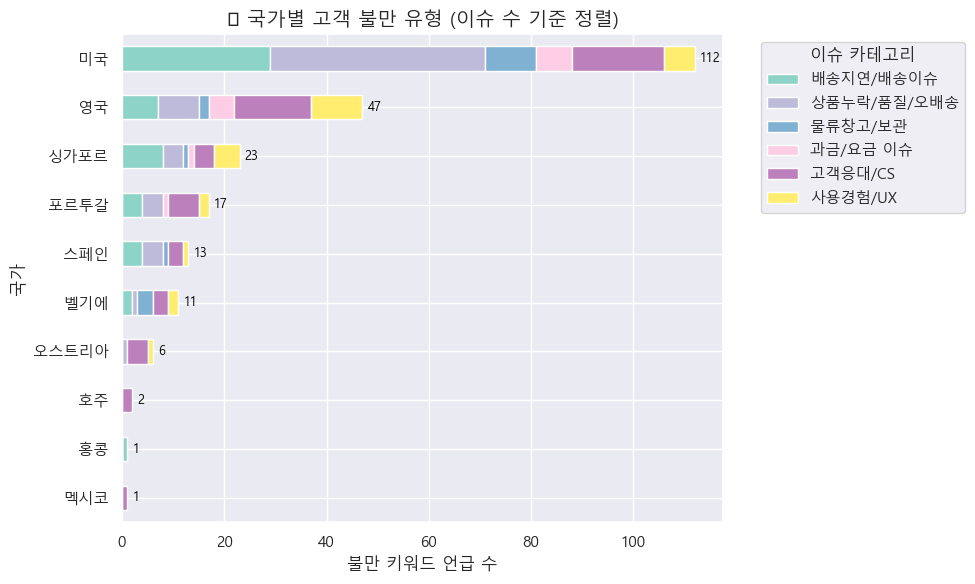

In [253]:
import matplotlib.pyplot as plt

# 1. Remove 'Ìï©Í≥Ñ' row and 'sum'/'Total' columns
plot_df = country_issue_df_with_total.drop(index='Ìï©Í≥Ñ', errors='ignore')
plot_df = plot_df.drop(columns=['sum', 'Total'], errors='ignore')

# 2. Sort by total number of issue mentions (row sum)
plot_df = plot_df.loc[plot_df.sum(axis=1).sort_values(ascending=True).index]

# 3. Plot stacked horizontal bar chart
ax = plot_df.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='Set3')

# 4. Add total value labels on the bars
for i, (index, row) in enumerate(plot_df.iterrows()):
    total = row.sum()
    ax.text(total + 1, i, str(int(total)), va='center', fontsize=9, color='black')

# 5. Final touches
plt.title("üìä Íµ≠Í∞ÄÎ≥Ñ Í≥†Í∞ù Î∂àÎßå Ïú†Ìòï (Ïù¥Ïäà Ïàò Í∏∞Ï§Ä Ï†ïÎ†¨)", fontsize=14)
plt.xlabel("Î∂àÎßå ÌÇ§ÏõåÎìú Ïñ∏Í∏â Ïàò")
plt.ylabel("Íµ≠Í∞Ä")
plt.legend(title="Ïù¥Ïäà Ïπ¥ÌÖåÍ≥†Î¶¨", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
